In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('/Users/antoniojosealvarez/Desktop/Programacion/time series/fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

In [3]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


### eliminamos el 2,5% superior e inferior

In [4]:
limite_superior=df['value'].quantile(0.975)
limite_inferior=df['value'].quantile(0.025)

In [5]:
df=df[(df['value']<limite_superior)&(df['value']>limite_inferior)]

In [6]:
df.columns

Index(['value'], dtype='object')

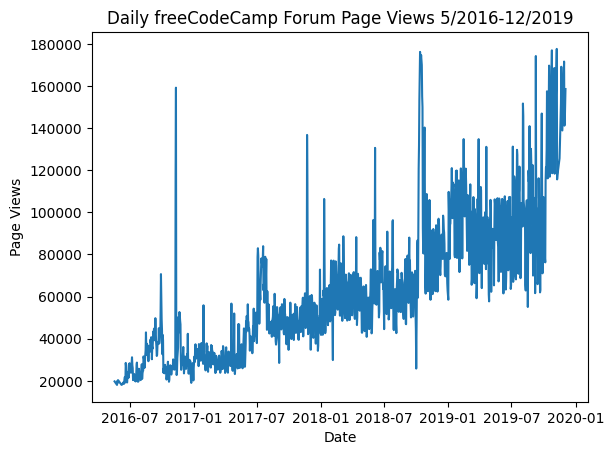

In [7]:
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
x=df.index
y=df['value']
plt.plot(x,y)

### Ajustamos los datos para establecer una grafica de barras agrupada por la media de cada mes a lo largo de los años

In [8]:
df['month']=df.index.month
df['year']=df.index.year

/var/folders/4h/g1dtkxv11bz48q4_qqtpg3kh0000gn/T/ipykernel_2571/2909689611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df.index.month
/var/folders/4h/g1dtkxv11bz48q4_qqtpg3kh0000gn/T/ipykernel_2571/2909689611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df.index.year


In [9]:
df

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


In [10]:
#agrupamos los datos y descomponemos el índice

df_bar=df.groupby(['year','month'])['value'].mean()
df_bar=df_bar.unstack()

In [11]:
df_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


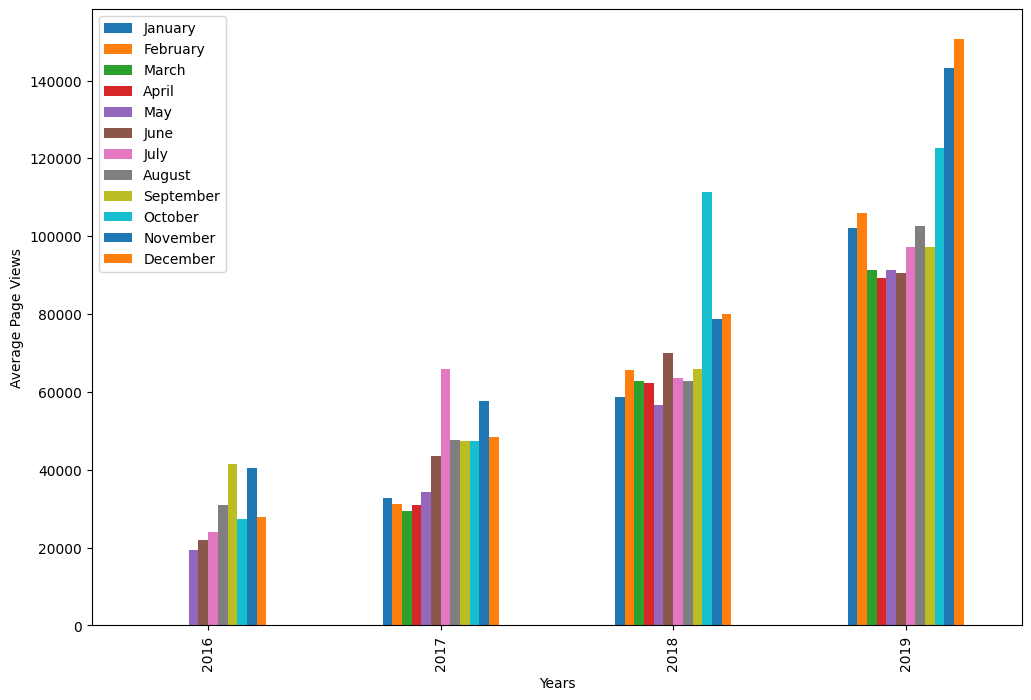

In [12]:
df_bar.plot.bar(figsize=(12,8),xlabel='Years',ylabel="Average Page Views",legend=True)
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'])


### Gráfica boxplot

In [16]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [17]:
df_box['month_num']=df_box['date'].dt.month
df_box=df_box.sort_values('month_num')

Text(0, 0.5, 'Page Views')

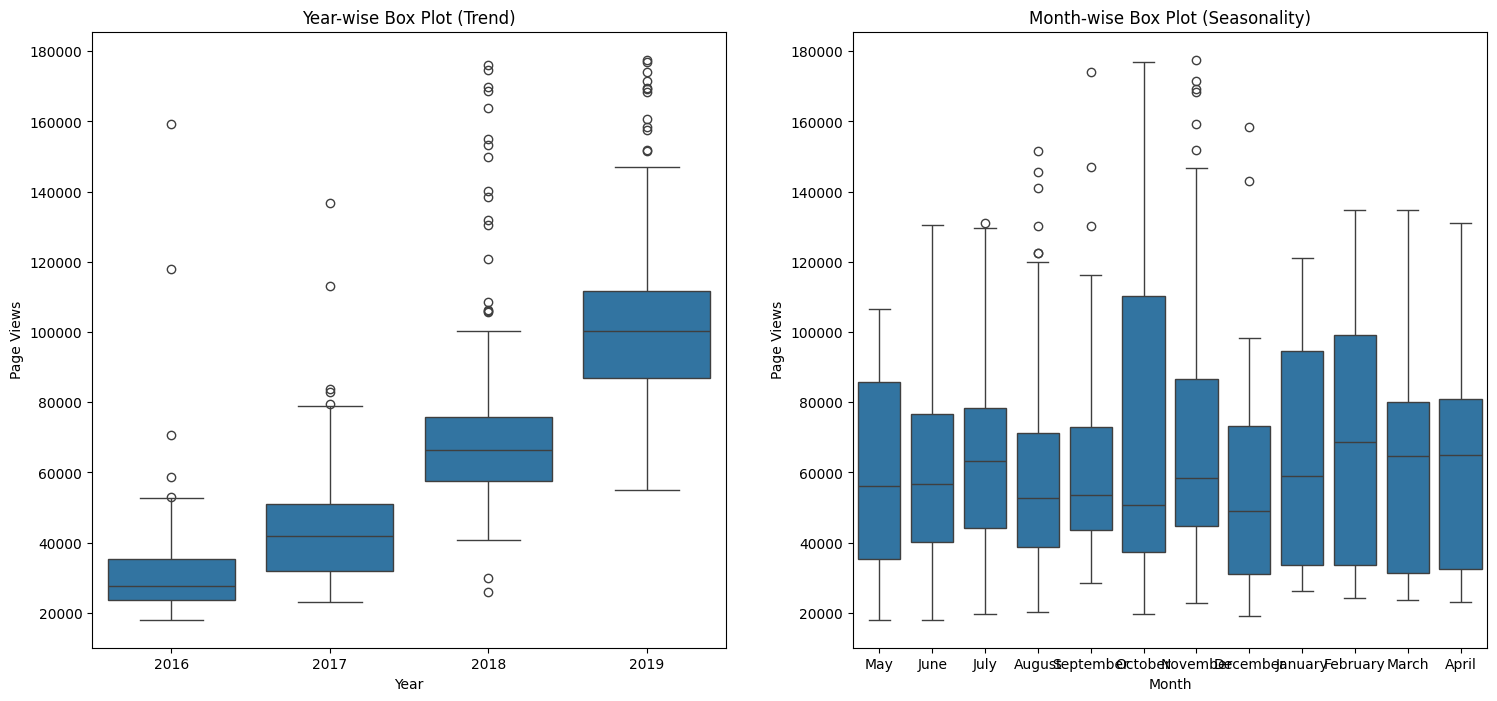

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
sns.boxplot(x=df.index.year, y='value', data=df, ax=axes[0])
sns.boxplot(x=df.index.month_name(), y='value', data=df, ax=axes[1])

axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')